In [ ]:
!pip install networkx
!pip install pandas
!pip install matplotlib

Female character network analysis

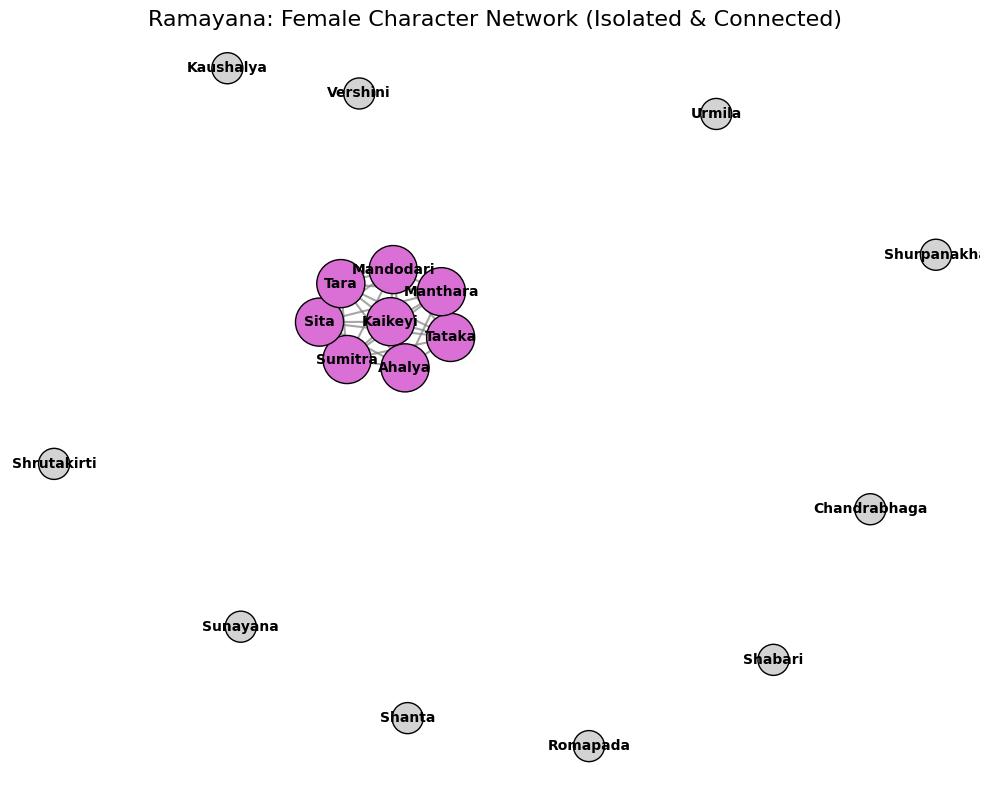

In [ ]:
import re
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

# Load the text
with open("ramayana_cleaned_output.txt", "r", encoding="utf-8") as f:
    text = f.read()

# Female characters
female_characters = list(set([
    "Sita","Kaushalya", "Sumitra", "Kaikeyi", "Urmila",
    "Shurpanakha", "Mandodari", "Shanta", "Tataka", "Shabari",
    "Manthara", "Tara", "Ahalya", "Chandrabhaga", "Shrutakirti",
    "Sunayana", "Vershini", "Romapada"
]))

# Paragraph-wise search
paragraphs = text.split('\n')

# Co-occurrence logic
co_occurrence = defaultdict(lambda: defaultdict(int))
for para in paragraphs:
    para_lower = para.lower()
    present = [name for name in female_characters if name.lower() in para_lower]
    for i in range(len(present)):
        for j in range(i + 1, len(present)):
            char1, char2 = sorted([present[i], present[j]])
            co_occurrence[char1][char2] += 1

# Edge list
edges = []
connected_characters = set()
for char1 in co_occurrence:
    for char2 in co_occurrence[char1]:
        weight = co_occurrence[char1][char2]
        edges.append((char1, char2, weight))
        connected_characters.update([char1, char2])

# Save to CSV
df_edges = pd.DataFrame(edges, columns=["Character 1", "Character 2", "Weight"])
df_edges.to_csv("ramayana_female_character_network.csv", index=False)

# Graph setup
G = nx.Graph()

# Add edges
for char1, char2, weight in edges:
    G.add_edge(char1, char2, weight=weight)

# Add isolated nodes
for character in female_characters:
    if character not in G.nodes:
        G.add_node(character)

# Determine isolated nodes
isolated = list(nx.isolates(G))

# Node colors and sizes
node_colors = ['lightgray' if node in isolated else 'orchid' for node in G.nodes()]
node_sizes = [500 + 100 * G.degree(node) for node in G.nodes()]  # scale by degree

# Plot
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42, k=0.6)

# Draw elements
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=node_sizes, edgecolors='black')
nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')
nx.draw_networkx_edges(
    G, pos,
    width=[0.5 + G[u][v]['weight'] for u, v in G.edges()],
    alpha=0.7, edge_color='gray'
)

# Title and layout
plt.title("Ramayana: Female Character Network (Isolated & Connected)", fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.savefig("ramayana_female_character_network_pretty.png", dpi=300)
plt.show()


Keywords in context method

In [ ]:
import re
import pandas as pd

# Define keywords for each character
kwic_dict = {
    "Sita": ["pativrata", "agni pariksha", "kidnap", "forest", "rescue"],
    "Kaikeyi": ["boon", "banishment", "manthara", "anger"],
    "Shurpanakha": ["lust", "cut nose", "rejection", "demoness"],
    "Urmila": ["sacrifice", "sleep", "devotion", "patience"],
    "Mandodari": ["wisdom", "queen", "ravana", "grief"],
    "Tara": ["sugriva", "bali", "grief", "queen"],
    "Shabari": ["hospitality", "berry", "devotion", "sage"],
    "Surpanakha": ["rejection", "revenge", "lust", "Rama", "Lakshmana"],
    "Kausalya": ["mother", "virtue", "love", "Rama"],
    "Sumitra": ["mother", "patience", "Lakshmana", "Bharata", "Shatrughna"],

}

# Assuming the text is already loaded into a variable named `text`
# Normalize text for matching
clean_text = re.sub(r'\s+', ' ', text.lower())

# Tokenize into words
tokens = clean_text.split()

# KWIC results
kwic_results = []

window_size = 5  # adjust for more/less context

for character, keywords in kwic_dict.items():
    for keyword in keywords:
        keyword = keyword.lower()
        for i, token in enumerate(tokens):
            if keyword in token:
                left_context = " ".join(tokens[max(0, i-window_size):i])
                right_context = " ".join(tokens[i+1:i+1+window_size])
                kwic_results.append({
                    "Character": character,
                    "Keyword": keyword,
                    "Left Context": left_context,
                    "Keyword Match": token,
                    "Right Context": right_context
                })

# Save to CSV
df_kwic = pd.DataFrame(kwic_results)
df_kwic.to_csv("ramayana_kwic_analysis.csv", index=False)

# Preview first few results
print(df_kwic.head(10))


  Character    Keyword                         Left Context Keyword Match  \
0      Sita  pativrata  bhadram te panim grihneeshwa panina     pativrata   
1      Sita     forest             abundance came from in a        forest   
2      Sita     forest       precincts of the hermitage the        forest   
3      Sita     forest       sadly he quitted the himalayan       forests   
4      Sita     forest        difficult way through a dense        forest   
5      Sita     forest       viswamitra said is the dandaka        forest   
6      Sita     forest               what is now a terrible        forest   
7      Sita     forest               they are still in this        forest   
8      Sita     forest                  you here to rid the        forest   
9      Sita     forest              and twanged it till the        forest   

                              Right Context  
0  mahabhaga chhayevanugata sada this sloka  
1     hermitage questioned by him vasishtha  
2          blo

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer

# Manually specify the NLTK data directory to avoid download errors
nltk.data.path.append('/root/nltk_data')  # Update this to the appropriate path

# Download necessary resources if not already available
try:
    nltk.download('stopwords')
except LookupError:
    print("Error downloading NLTK stopwords. Please check your internet connection or NLTK configurations.")

# Function to preprocess text
def preprocess_text(file_path):
    # Read the file
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()

    # Convert text to lowercase
    text = text.lower()

    # Remove non-alphabetic characters (keeping spaces)
    text = re.sub(r'[^a-z\s]', '', text)

    # Use RegexpTokenizer (alternative to word_tokenize) to tokenize words
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))  # Adjust for Hindi or other languages as needed
    tokens = [word for word in tokens if word not in stop_words]

    # Optionally, apply stemming (you can replace it with Lemmatization if preferred)
    ps = PorterStemmer()
    tokens = [ps.stem(word) for word in tokens]

    return tokens

# Example usage
file_path = 'ramayana.txt'
processed_tokens = preprocess_text(file_path)

# Print first 20 tokens for verification
print(processed_tokens[:20])


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['concept', 'north', 'ganga', 'great', 'kingdom', 'kosala', 'made', 'fertil', 'river', 'sarayu', 'capit', 'ayodhya', 'built', 'manu', 'famou', 'ruler', 'solar', 'dynasti', 'valmiki', 'descript']


In [ ]:
!pip install wordcloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


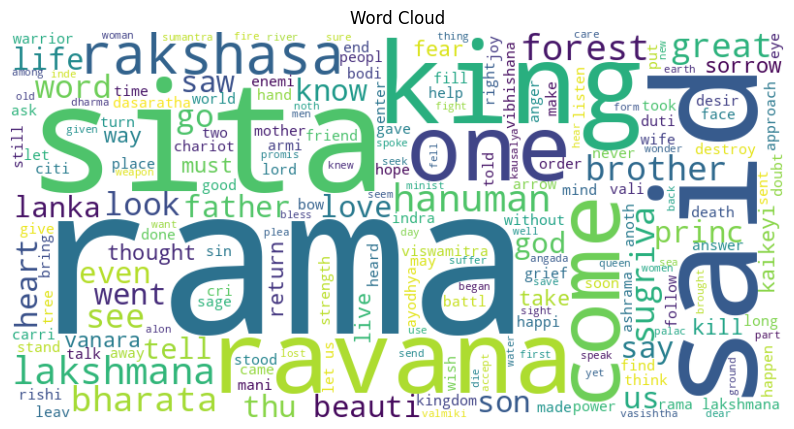

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Manually specify the NLTK data directory to avoid download errors
nltk.data.path.append('/root/nltk_data')  # Update this to the appropriate path

# Download necessary resources if not already available
try:
    nltk.download('stopwords')
except LookupError:
    print("Error downloading NLTK stopwords. Please check your internet connection or NLTK configurations.")

# Function to preprocess text
def preprocess_text(file_path):
    # Read the file
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()

    # Convert text to lowercase
    text = text.lower()

    # Remove non-alphabetic characters (keeping spaces)
    text = re.sub(r'[^a-z\s]', '', text)

    # Use RegexpTokenizer (alternative to word_tokenize) to tokenize words
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))  # Adjust for Hindi or other languages as needed
    tokens = [word for word in tokens if word not in stop_words]

    # Optionally, apply stemming (you can replace it with Lemmatization if preferred)
    ps = PorterStemmer()
    tokens = [ps.stem(word) for word in tokens]

    return tokens

# Function to generate word cloud
def generate_word_cloud(tokens):
    # Join tokens to form a string of words
    text = " ".join(tokens)

    # Create a word cloud instance
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

    # Plot the word cloud using matplotlib
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Turn off the axis
    plt.title('Word Cloud')
    plt.show()

# Example usage
file_path = 'ramayana.txt'
processed_tokens = preprocess_text(file_path)

# Generate word cloud
generate_word_cloud(processed_tokens)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Top 20 Most Frequent Words:
rama: 1328
sita: 577
king: 522
said: 507
like: 428
lakshmana: 405
ravana: 383
forest: 360
one: 339
rakshasa: 332
shall: 303
come: 300
would: 294
go: 282
hanuman: 270
could: 256
us: 250
bharata: 248
great: 240
brother: 233


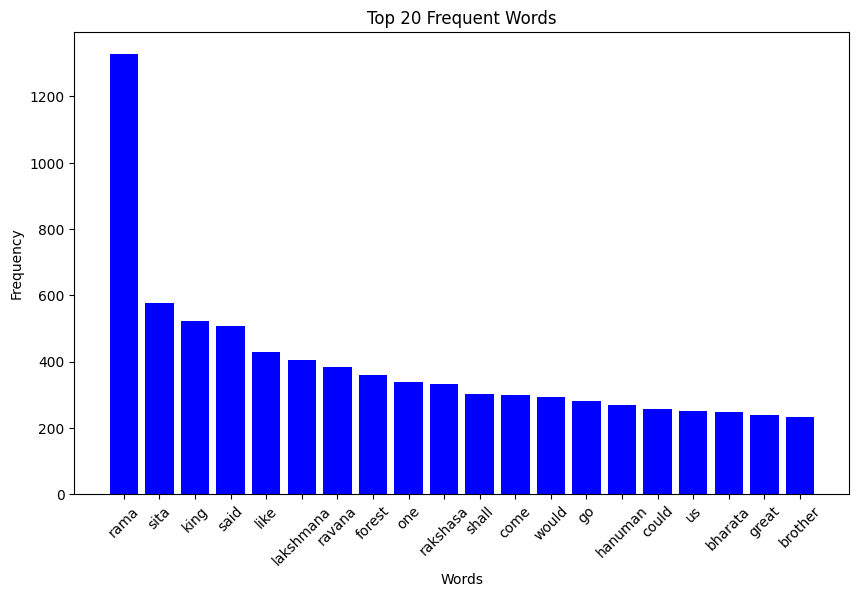

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer
from collections import Counter
import matplotlib.pyplot as plt

# Manually specify the NLTK data directory to avoid download errors
nltk.data.path.append('/root/nltk_data')  # Update this to the appropriate path

# Download necessary resources if not already available
try:
    nltk.download('stopwords')
except LookupError:
    print("Error downloading NLTK stopwords. Please check your internet connection or NLTK configurations.")

# Function to preprocess text
def preprocess_text(file_path):
    # Read the file
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()

    # Convert text to lowercase
    text = text.lower()

    # Remove non-alphabetic characters (keeping spaces)
    text = re.sub(r'[^a-z\s]', '', text)

    # Use RegexpTokenizer (alternative to word_tokenize) to tokenize words
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))  # Adjust for Hindi or other languages as needed
    tokens = [word for word in tokens if word not in stop_words]

    # Optionally, apply stemming (you can replace it with Lemmatization if preferred)
    ps = PorterStemmer()
    tokens = [ps.stem(word) for word in tokens]

    return tokens

# Function for Frequent Word Analysis
def frequent_word_analysis(tokens, top_n=20):
    # Count word frequencies using Counter
    word_counts = Counter(tokens)

    # Get the top N most common words
    most_common_words = word_counts.most_common(top_n)

    # Print the most common words and their frequencies
    print("Top", top_n, "Most Frequent Words:")
    for word, freq in most_common_words:
        print(f"{word}: {freq}")

    # Plot the most frequent words using matplotlib
    words, freqs = zip(*most_common_words)
    plt.figure(figsize=(10, 6))
    plt.bar(words, freqs, color='blue')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title(f'Top {top_n} Frequent Words')
    plt.xticks(rotation=45)
    plt.show()

# Example usage
file_path = 'ramayana.txt'
processed_tokens = preprocess_text(file_path)

# Perform frequent word analysis
frequent_word_analysis(processed_tokens, top_n=20)
